#                     EDA on Haberman's Cancer Survival Dataset.

- High level statistics of the dataset: number of points, numer of features, number of classes, data-points per class.

In [0]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
cancer_data = pd.read_csv('haberman.csv')

In [0]:
cancer_data.shape # Number of Points

(306, 4)

In [0]:
cancer_data.columns # Number of features

Index(['age', 'year', 'nodes', 'status'], dtype='object')

- Here we have two classes we are coverting the status column data into catageorical data

In [0]:
# assigning 1 as yes i.e patient has survived after 5 years 
# assigning 2 as no i.e patient has not survived after 5 years
cancer_data['status'] = cancer_data['status'].map({1:'Yes',2:'No'}) 
#converting data type form int to object
cancer_data['status'] = cancer_data['status'].astype('category')
cancer_data.head()

,age,year,nodes,status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes


In [0]:
cancer_data['status'].value_counts()

Yes    225
No      81
Name: status, dtype: int64

- 225 Patient were survivied after 5 years 
- 81 Patients were not survived after 5 years


**Objective : classifing a new patient based up on the age,year of treatement and lymph nodes, wether patient will survive after 5 years or not.**

# Univaraite analysis :  

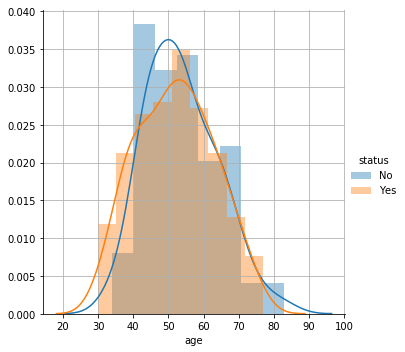

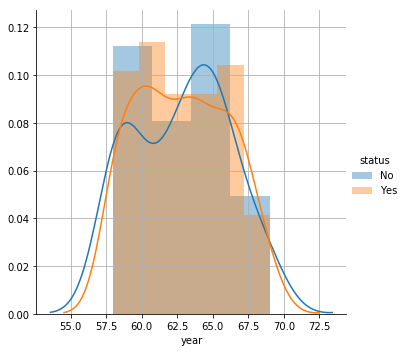

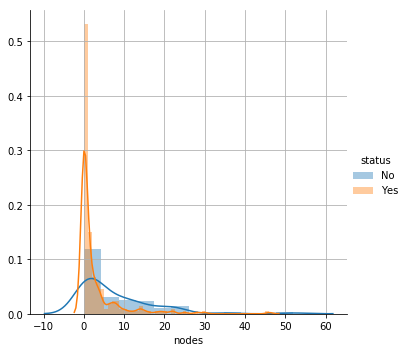

In [0]:
for i, features in enumerate(cancer_data.columns[0:3]):
  sns.FacetGrid(data=cancer_data,hue='status',height=5)\
    .map(sns.distplot,features).add_legend();
  plt.grid();
  plt.show();

* Line passing around the histogram is smoothed version of the PDF i.e density.
* PDF plot between count and age, count and year of operation both are over lapping it is hard to infer the information here.
* Approximate infreancess is Age grater than 40 and lessthan 45 the servival density is very less.
* Here the overlap is huge between servival rate to age density.
* PDF plot between Lymph nodes vs count we can infer that if nodes from 0 to 3 the survival status ater 5 years are high.

* Opertion after 1964 and less than 1966, density of patient survived after 5 yers is less.
* Here the overlap is huge between servival rate to year of operaion.

* If Lymph nodes are less the survival rate is high.
* The density of survival is high for the patient with lymph nodes lessthan or equal to 1
* There is overlap but it is better case when compared with other two features i.e age and year of operation.

**Fig 2.1 :** **CDF** 

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


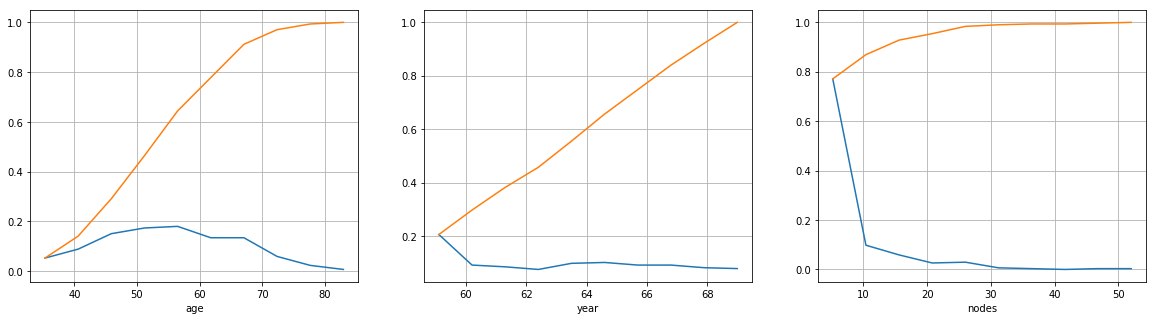

In [0]:
survived_after_5years = cancer_data[cancer_data['status'] == 'Yes']
not_survived_after_5years = cancer_data[cancer_data['status'] == 'No']
import numpy as np
plt.figure(figsize=(20,5))
for i,features in enumerate(cancer_data.columns[0:3]):
  plt.subplot(1,3,i+1)
  counts, bin_edges = np.histogram(cancer_data[features], bins=10, density = True)
  pdf = counts/(sum(counts))
  print(pdf);
  print(bin_edges);
  cdf = np.cumsum(pdf)
  plt.plot(bin_edges[1:],pdf);
  plt.plot(bin_edges[1:],cdf);
  plt.xlabel(features);
  plt.grid();


* Patients with less than 65 years are 80 percent here.
* Here from the CDF for Postive Lymph nodes we can infer 80% of nodes are less than or equal to 5 nodes.

**Fig 2.2:** BOX PLOT

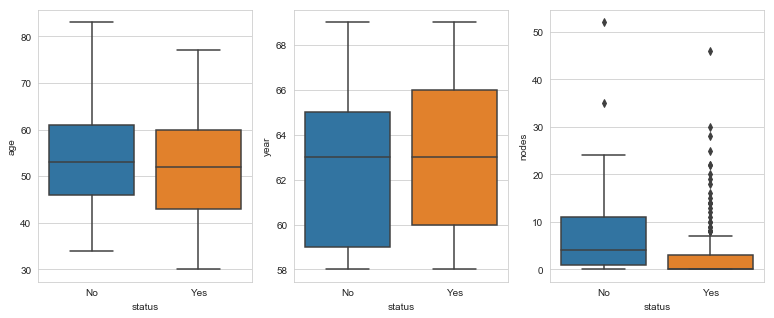

In [0]:
fig , axis = plt.subplots(1,3,figsize=(13,5))
for i,feature in enumerate(cancer_data.columns[0:3]):
    sns.boxplot(x='status', y=feature, data = cancer_data,ax=axis[i])
    sns.set_style('whitegrid');
plt.show();

* The patients surivial rate is slightly higher who are treated after 1966 when compared with rest.
* The chace of patient survival is lower who are treated before 1959 when compared with rest.

- Referance :https://stackoverflow.com/questions/41659188/how-to-adjust-subplot-size-in-seaborn 

C:\Users\dell\Ai\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


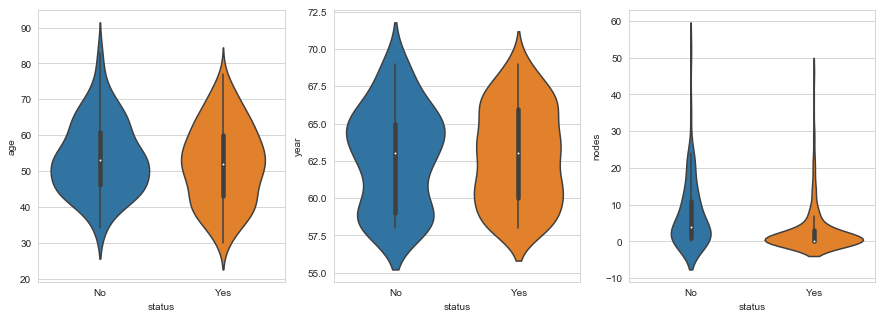

In [0]:
fig , axis = plt.subplots(1,3,figsize=(15,5))
for i,features in enumerate(cancer_data.columns[0:3]):
    sns.violinplot(x='status',y=features,data = cancer_data,ax=axis[i])
    sns.set_style('whitegrid');
plt.show();

## Bi variate Analysis

### **2D Scatter Plot**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


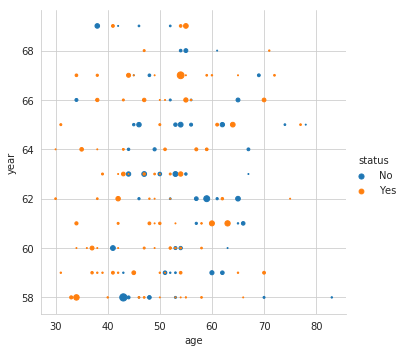

In [0]:
year_of_operation = cancer_data['year']
number_of_lymph_nodes = cancer_data['nodes']
sns.set_style('whitegrid');
sns.FacetGrid(cancer_data,hue='status',size=5).map(plt.scatter,'age','year','nodes').add_legend()
plt.show();

* Here It is very hard to infer from the 2d scatter plot when feature are not well sepeated.

**Pair Plot**

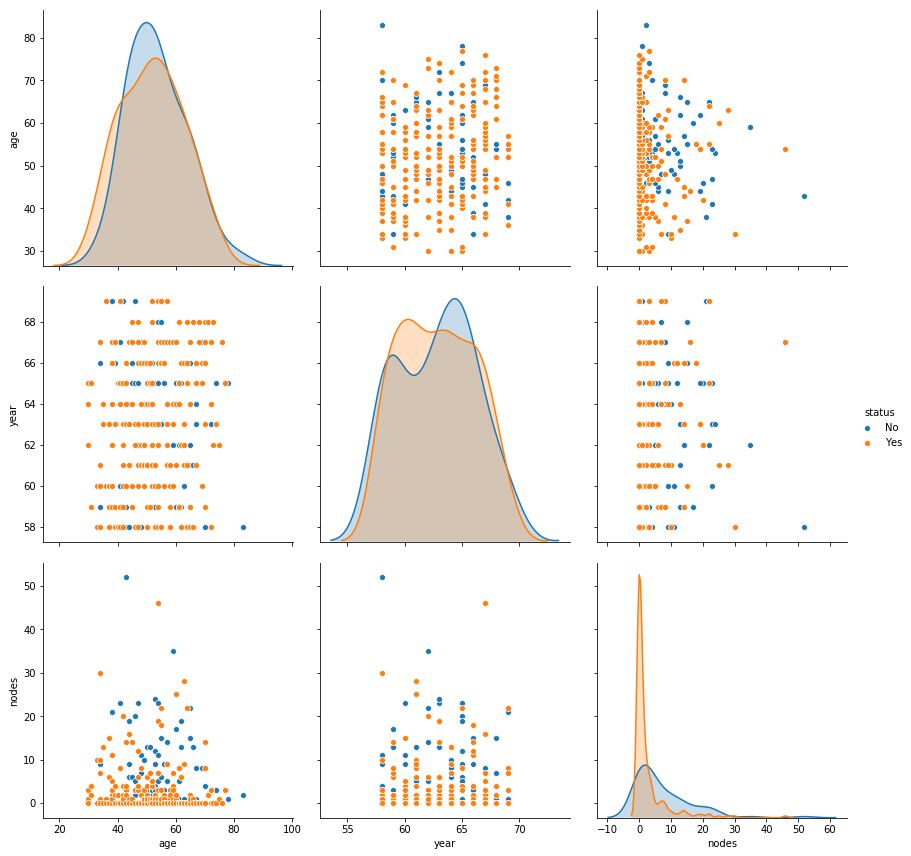

In [0]:
sns.pairplot(cancer_data,hue ='status',height=4);

* Here we are finding the relation between pair of two features.
* The scatter data between year and nodes i.e year of treatement and lymph nodes are better seperated when compared with other relation.